In [1]:
%matplotlib inline


from modsim import *

In [2]:
system = System(t0 = 2017, 
                t_end = 2037,
                jag_pop0 = 15000,
                jag_birth_rate = 0.205,
                jag_death_rate = 0.2,
                eater_pop0 = 5000,
                eater_birth_rate = 0.228,
                eater_death_rate = 0.2,
                ant_pop0 = 7000000,
                ant_birth_rate = 0.203,
                ant_death_rate = 0.2,
                eater_eat_rate = 1.6,
                jag_eat_rate = 0.01)
system

,value
t0,2017.000
t_end,2037.000
jag_pop0,15000.000
jag_birth_rate,0.205
jag_death_rate,0.200
eater_pop0,5000.000
eater_birth_rate,0.228
eater_death_rate,0.200
ant_pop0,7000000.000
ant_birth_rate,0.203


In [3]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    jag = TimeSeries()
    jag[system.t0] = system.jag_pop0
    eater = TimeSeries()
    eater[system.t0] = system.eater_pop0
    ant = TimeSeries()
    ant[system.t0] = system.ant_pop0
    
    for t in linrange(system.t0, system.t_end):
        jag_births = system.jag_birth_rate * jag[t]
        jag_deaths = system.jag_death_rate * jag[t]
        eater_births = system.eater_birth_rate * eater[t]
        eater_deaths = system.eater_death_rate * eater[t]
        ant_births = system.ant_birth_rate * ant[t]
        ant_deaths = system.ant_death_rate * ant[t]
        jag_starved = jag[t] * system.jag_eat_rate / eater[t] * jag[t] / 5
        eater_killed = jag[t] * system.jag_eat_rate
        ant_killed = eater[t] * system.eater_eat_rate * 3
        eater_starved = eater[t] * system.eater_eat_rate / ant[t] * eater[t]
        jag[t+1] = jag[t] + jag_births - jag_deaths - jag_starved
        eater[t+1] = eater[t] + eater_births - eater_deaths - eater_killed - eater_starved
        ant[t+1] = ant[t] + ant_births - ant_deaths - ant_killed
        if(eater[t+1] < 1):
            eater[t+1] = 1
        if(jag[t+1] < 1):
            jag[t+1] = 1
        if(ant[t+1] < 1):
            ant[t+1] = 1
        
    system.jag = jag
    system.eater = eater
    system.ant = ant

In [4]:
run_simulation(system)

In [5]:
def plot_results(system, title=None,xLabel = 'Year'):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.jag, 'bo-', label='Jaguars')
    plot(system.eater, 'go-', label='Anteaters')
    plot(system.ant / 1000, 'ro-', label='Ants (Billion)')
    decorate(xlabel=xLabel, 
             ylabel='Final Population',
             title=title,
             ylim = ylim(0,24000))

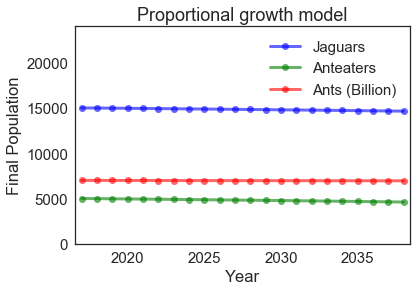

In [6]:
plot_results(system, title='Proportional growth model')

In [7]:
def sweep_jag_birth_rate_plot(start = 0.18,end = 0.22,num_steps = 41):
    for i in linspace(start,end,num_steps):
        system.jag_birth_rate = i
        run_simulation(system)
        plot_results(system, title=i)

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


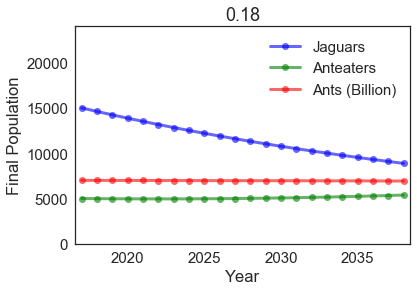

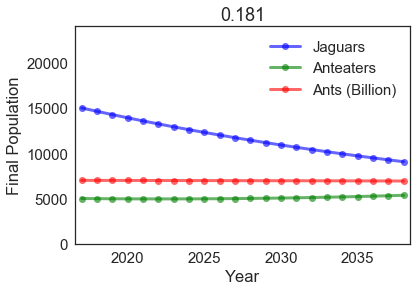

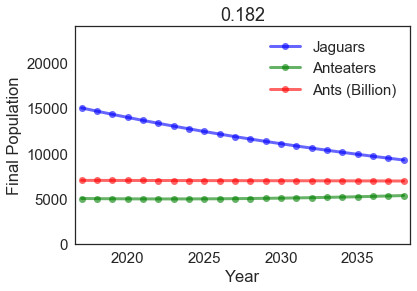

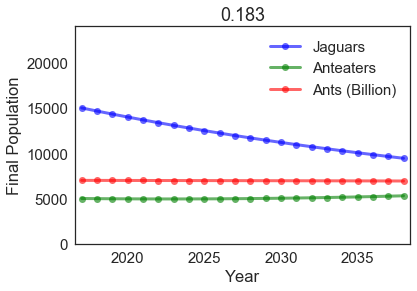

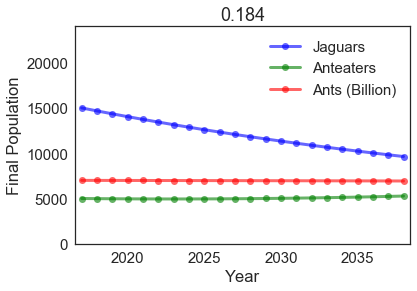

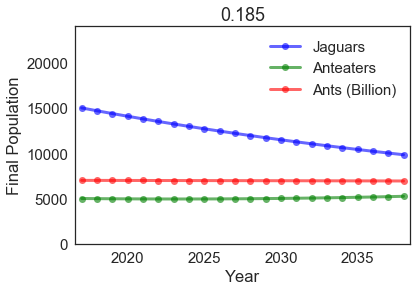

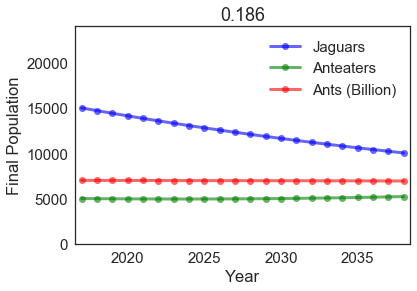

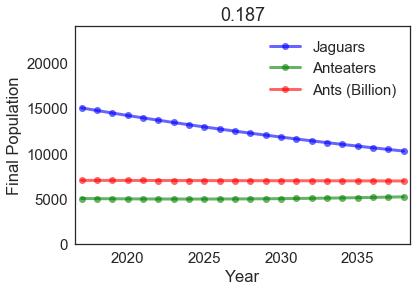

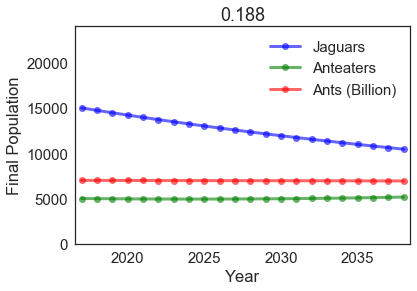

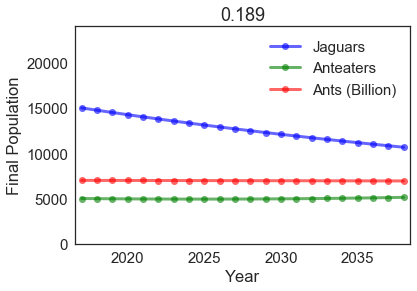

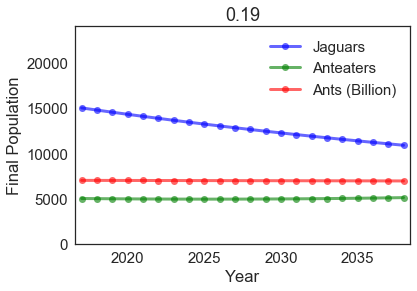

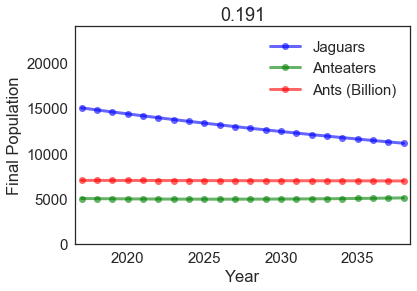

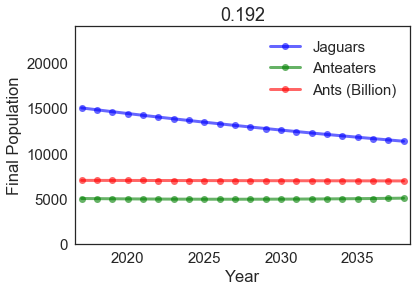

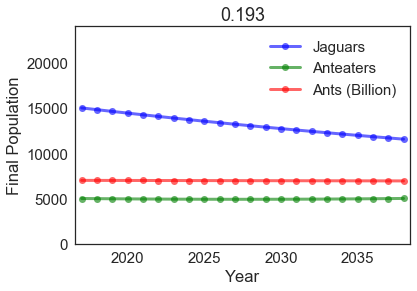

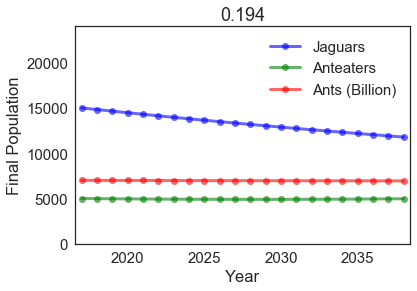

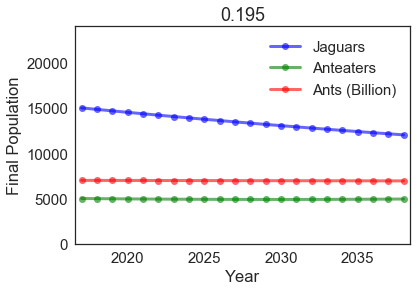

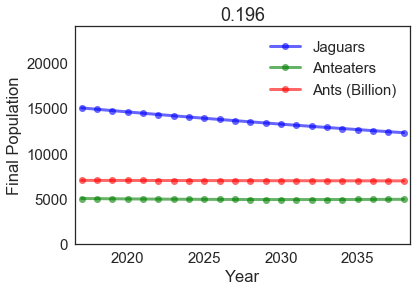

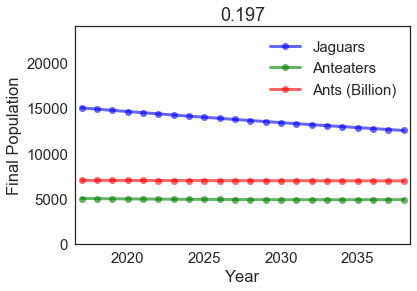

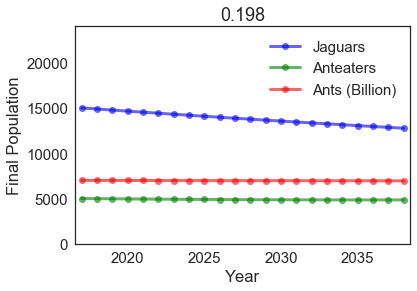

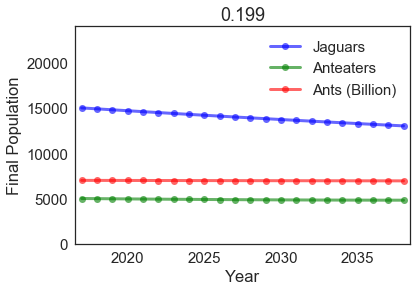

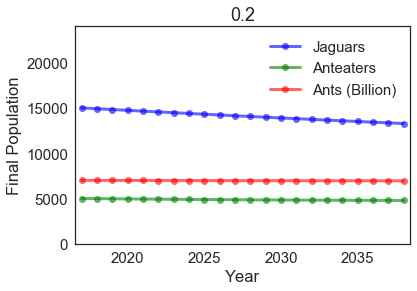

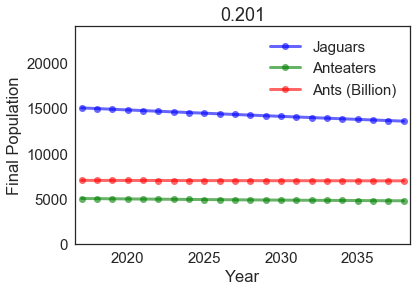

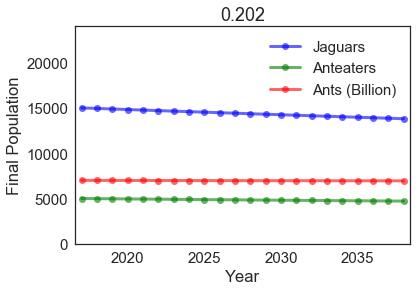

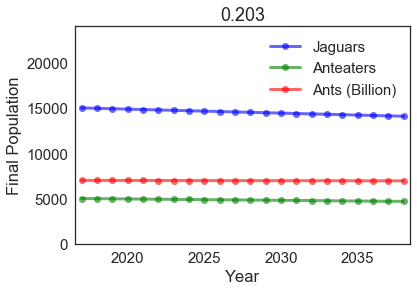

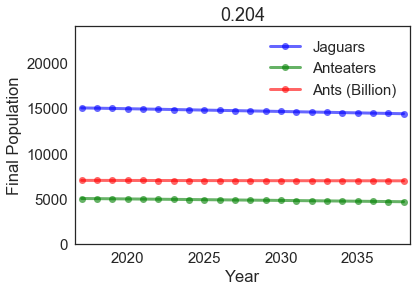

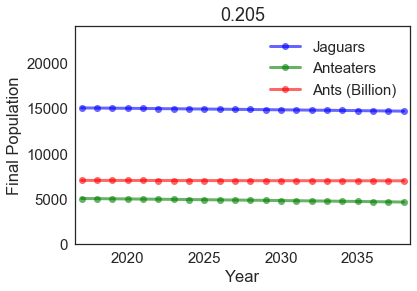

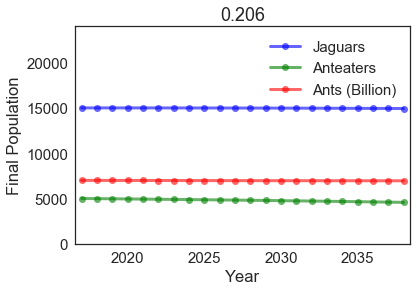

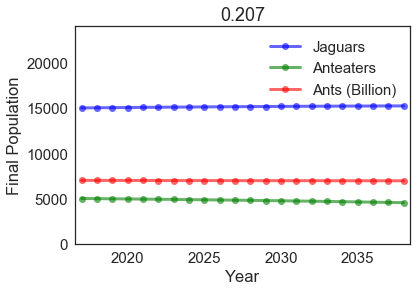

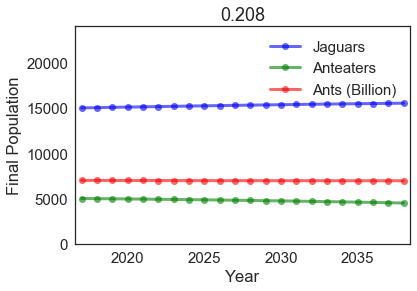

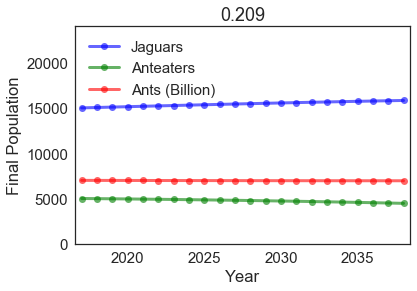

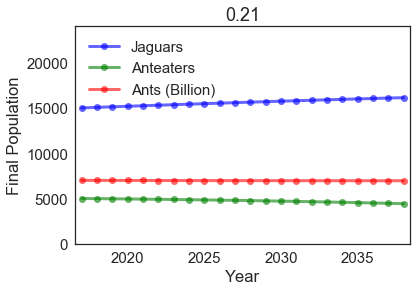

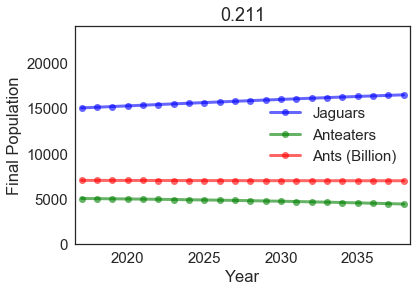

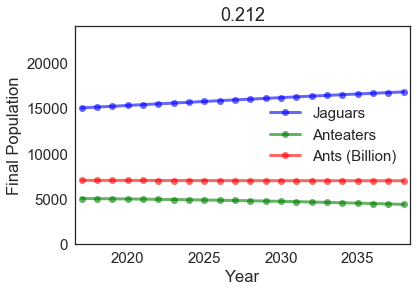

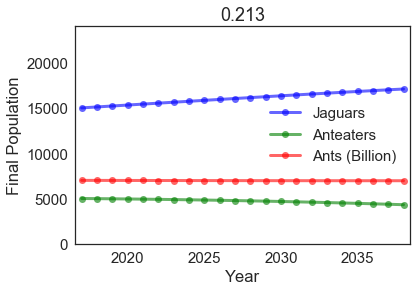

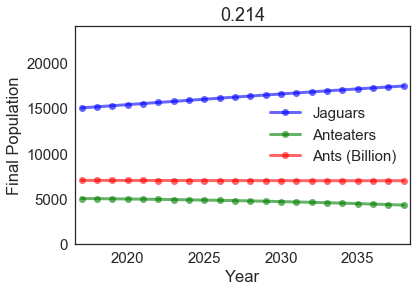

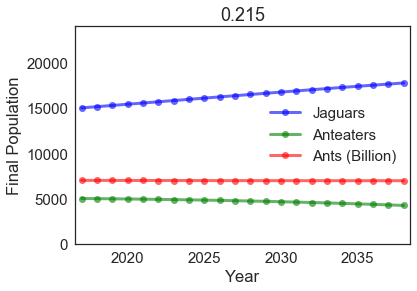

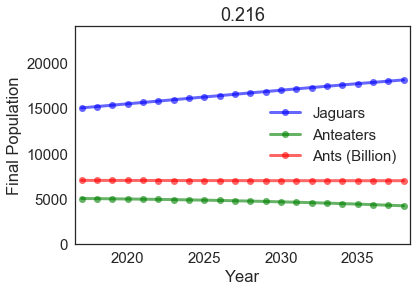

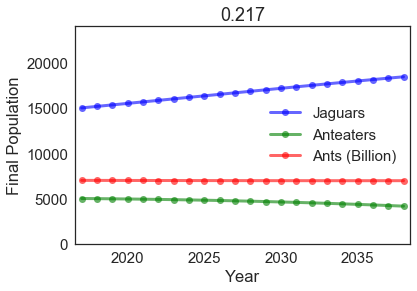

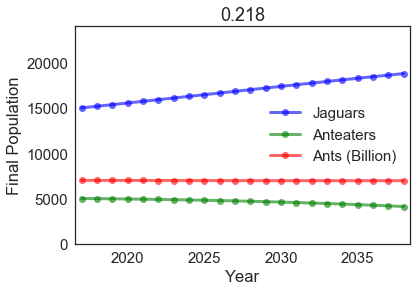

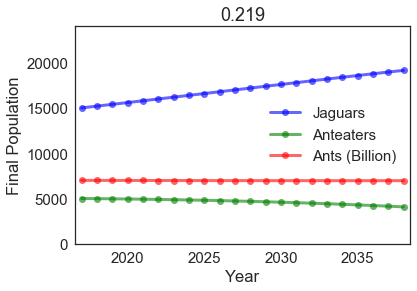

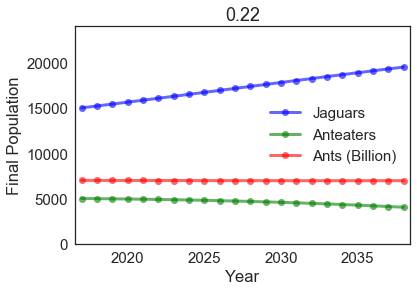

In [8]:
sweep_jag_birth_rate_plot()

In [9]:
def sweep_jag_birth_rate_table(start = 0.18,end = 0.22,num_steps = 41):
    animals = System()
    animals.jag = TimeSeries()
    animals.ant = TimeSeries()
    animals.eater = TimeSeries()
    for i in linspace(start,end,num_steps):
        system.jag_birth_rate = i
        run_simulation(system)
        animals.jag[i] = system.jag[system.t_end]
        animals.ant[i] = system.ant[system.t_end]
        animals.eater[i] = system.eater[system.t_end]
    return animals

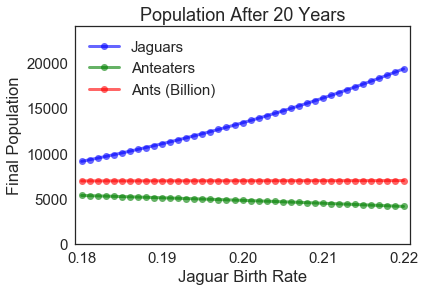

In [10]:
animals = sweep_jag_birth_rate_table()
plot_results(animals,title = 'Population After 20 Years',xLabel = 'Jaguar Birth Rate')

In [11]:
def sweep_jag_death_rate_table(start = 0.18,end = 0.22,num_steps = 41):
    animals = System()
    animals.jag = TimeSeries()
    animals.ant = TimeSeries()
    animals.eater = TimeSeries()
    for i in linspace(start,end,num_steps):
        system.jag_death_rate = i
        run_simulation(system)
        animals.jag[i] = system.jag[system.t_end]
        animals.ant[i] = system.ant[system.t_end]
        animals.eater[i] = system.eater[system.t_end]
    return animals

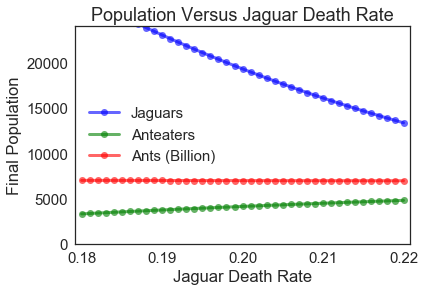

In [12]:
animals = sweep_jag_death_rate_table()
plot_results(animals,title = 'Population Versus Jaguar Death Rate',xLabel = 'Jaguar Death Rate')

In [13]:

def sweep_jag_death_rate_plot(start = 0.18,end = 0.22,num_steps = 41):
    for i in linspace(start,end,num_steps):
        system.jag_death_rate = i
        run_simulation(system)
        plot_results(system, title=i)

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


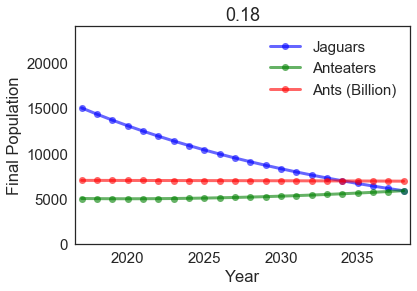

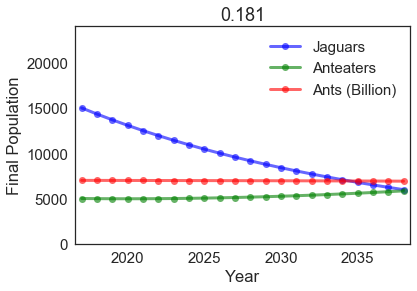

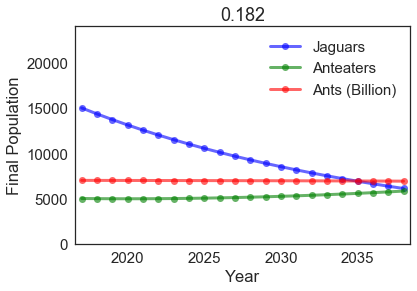

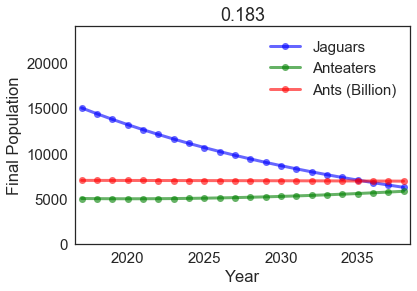

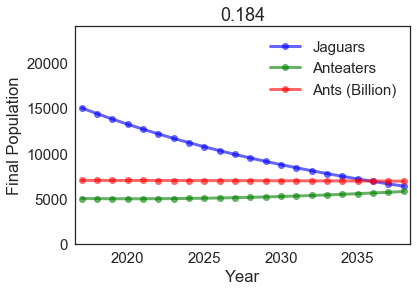

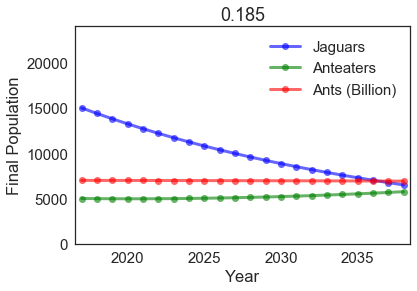

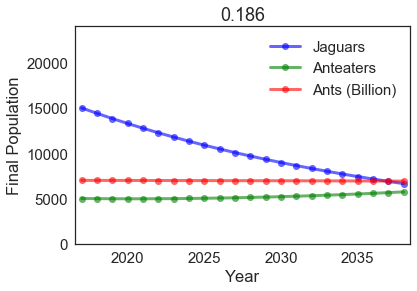

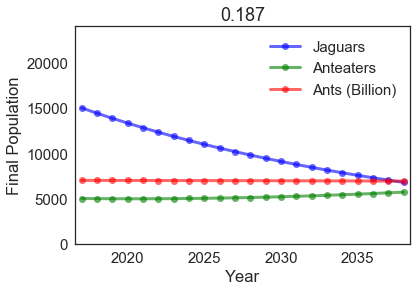

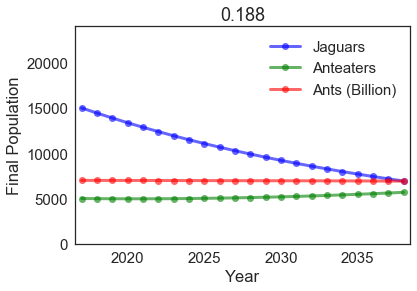

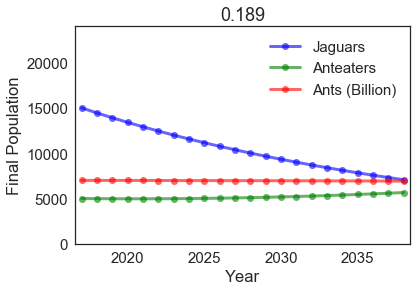

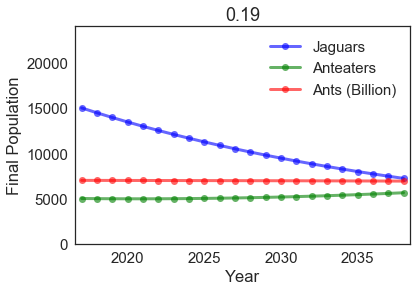

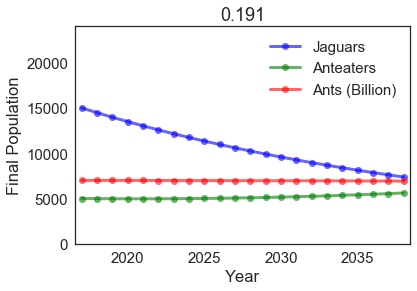

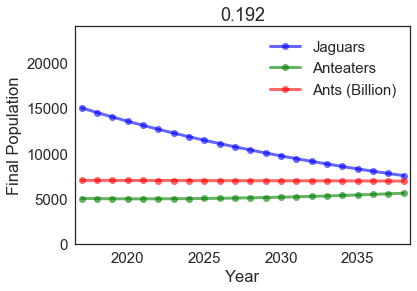

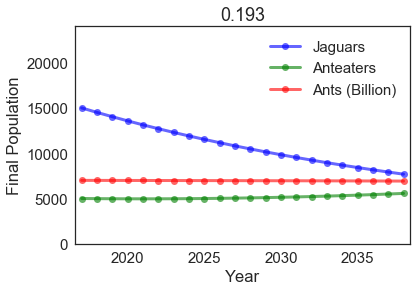

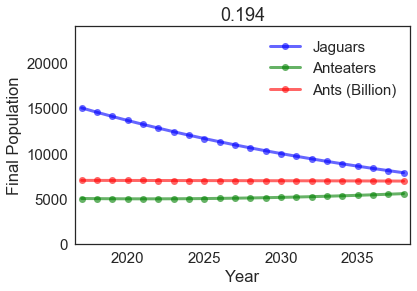

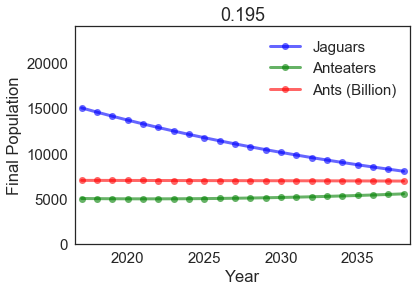

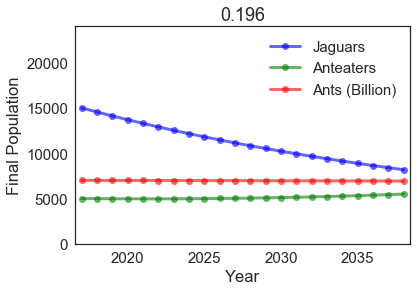

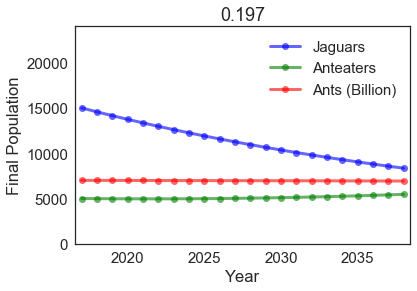

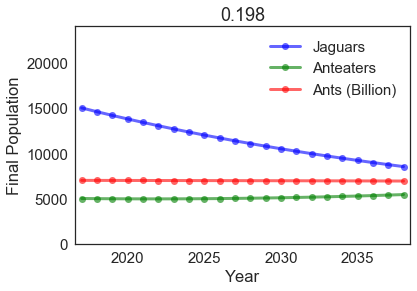

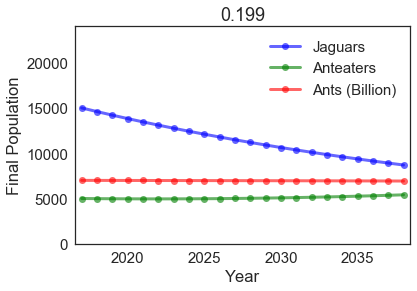

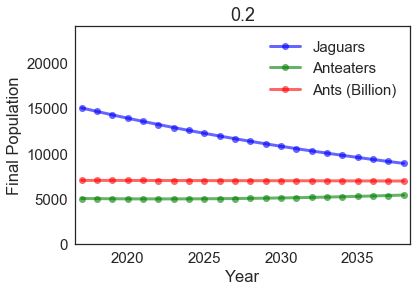

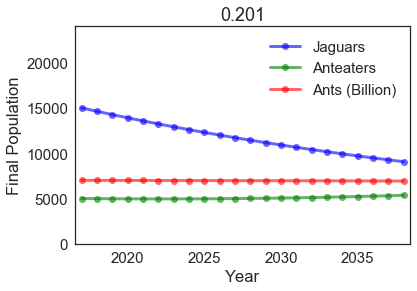

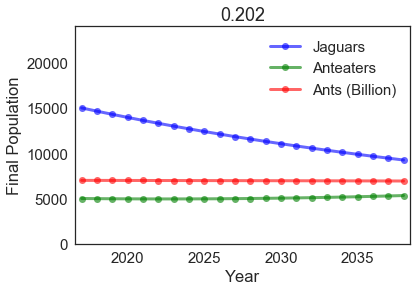

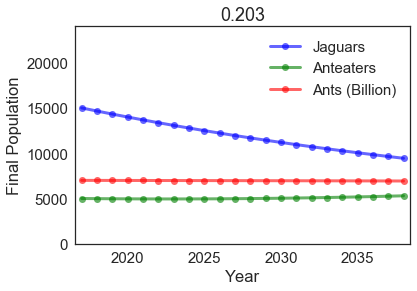

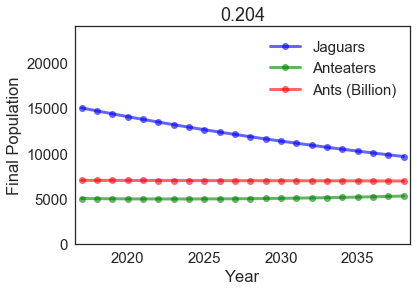

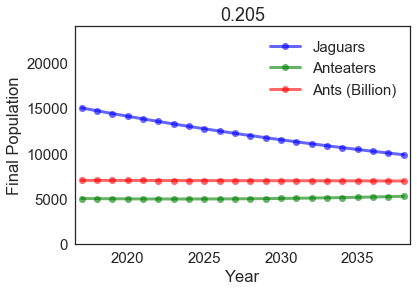

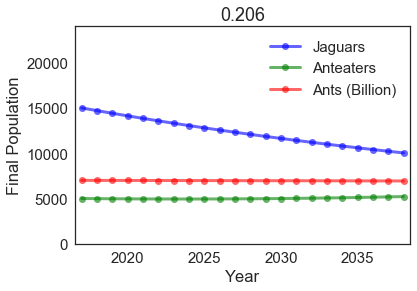

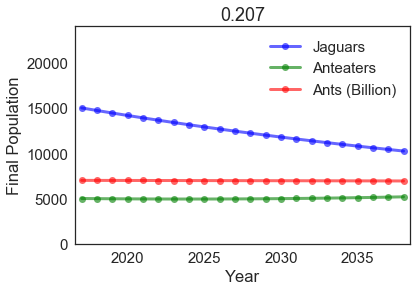

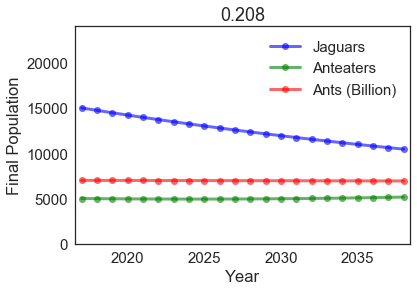

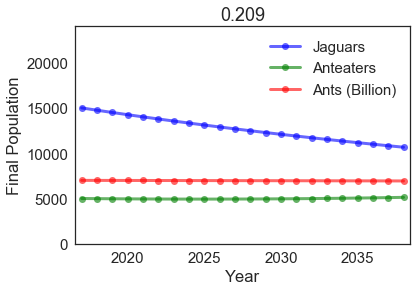

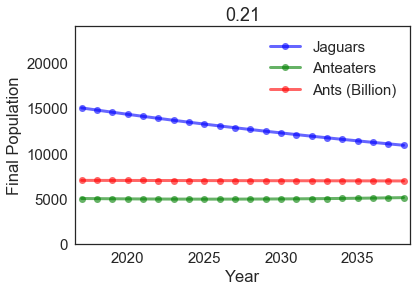

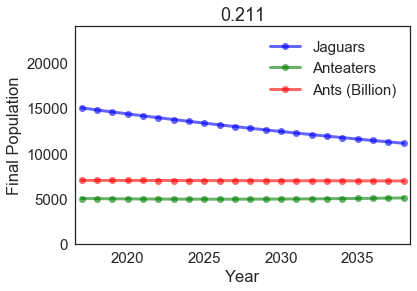

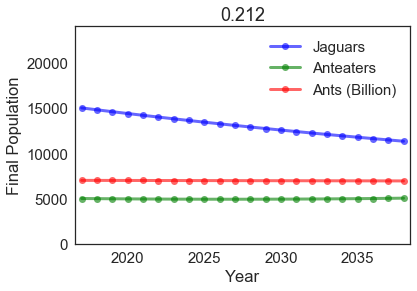

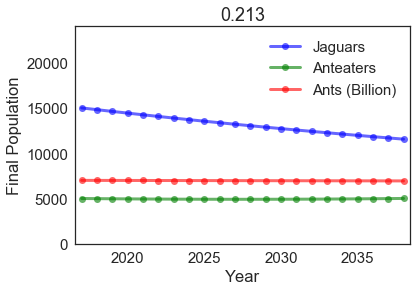

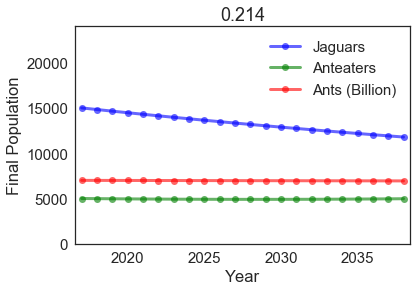

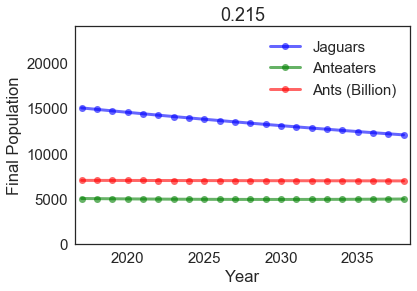

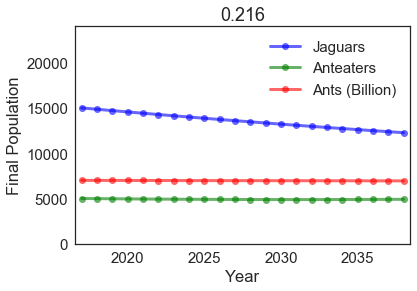

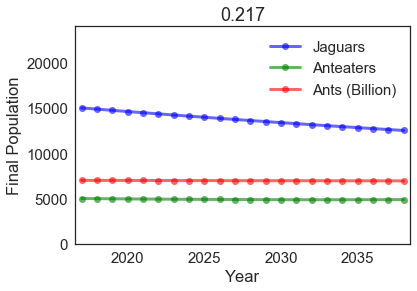

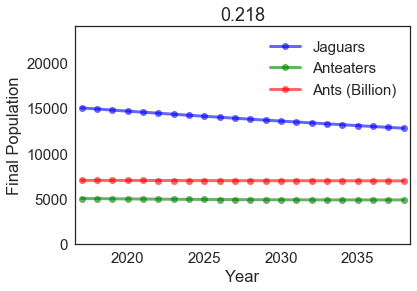

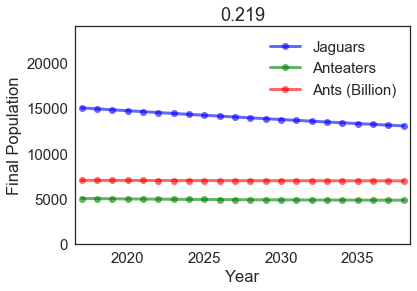

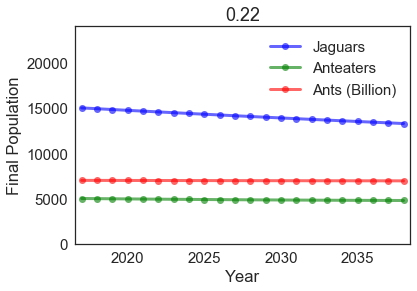

In [14]:
sweep_jag_birth_rate_plot()

In [ ]:
def sweep_ant_death_rate_table(start = 0.18,end = 0.22,num_steps = 41):
    animals = System()
    animals.jag = TimeSeries()
    animals.ant = TimeSeries()
    animals.eater = TimeSeries()
    for i in linspace(start,end,num_steps):
        system.ant_death_rate = i
        run_simulation(system)
        animals.jag[i] = system.jag[system.t_end]
        animals.ant[i] = system.ant[system.t_end]
        animals.eater[i] = system.eater[system.t_end]
    return animals